In [1]:
import copy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 날짜 데이터 생성
from datetime import datetime

# 선형 회구분석 (절편 intercept 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
# Prophet
from fbprophet import Prophet

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df = pd.read_csv("./new_sales4.csv", encoding='euc-kr')
df.head(1)

: 

In [ ]:
df_time = df.groupby(['구매일', '물품대분류'])['주문번호'].count()
df_time = pd.DataFrame(df_time).reset_index()
df_time

: 

In [ ]:
df_time = df_time[df_time['물품대분류'] == '2단계']
df_time.head()

: 

# 시계열 프로펫

In [ ]:
df_time['ds'] = pd.to_datetime(df_time['구매일'], format='%Y-%m-%d')
df_time['y'] = df_time['주문번호']
df_series = df_time[['ds','y']]

print(df_series)

: 

In [ ]:
m = Prophet()
m.fit(df_series)

a = m.make_future_dataframe(periods = 10, freq = 'd')
b = m.predict(a)

b[['ds', 'yhat','yhat_lower','yhat_upper']].tail()
m.plot(b)


: 

In [ ]:
# 모델 적합 Fit the model
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit()

: 

In [ ]:
# Fit the model

fcast_time = 90
df_forecast = df_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
df_forecast.tail(10)

: 

In [ ]:
# Forcasting - call the method predict

df_forecast = df_prophet.predict(df_forecast)

: 

In [ ]:
# 예측결과 확인

df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

: 

In [ ]:
# 예측값 시각화

df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Quantity')

: 

In [ ]:
# 교차검증 분석

from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(df_prophet, initial = '1095 days', period = '180 days', \
    horizon = '365 days')
df_cv.head()

: 

In [ ]:
# 모형 성능 확인

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
# 교차검증 결과 시각화

from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric = 'mae')

# 시계열 아리마

NameError: name 'df_time' is not defined

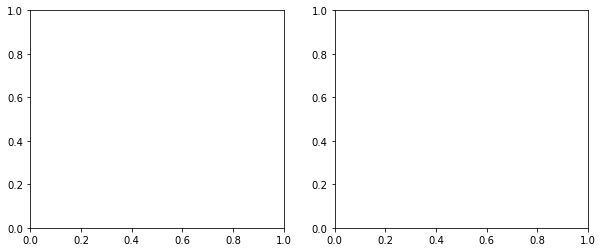

In [2]:
p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_time['주문번호'],ax=axes[0]) #q=0
plot_pacf(df_time['주문번호'],ax=axes[1]) #p=1
plt.show()

In [ ]:
# 1차 차분

# df_time_diff1 = df_time - df_time.shift(1)
# df_time_diff1.plot()

df_time['주문번호2'] = df_time['주문번호'].diff(1)
df_time.head()

: 

In [ ]:
p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_time['구매금액2'].iloc[1:],ax=axes[0]) 
plot_pacf(df_time['구매금액2'].iloc[1:],ax=axes[1]) 
plt.show()

: 

: 

: 

: 

: 

: 

: 

: 